In [45]:
import mne
from matplotlib import pyplot as plt
import mne_bids
import pybv
import os

In [23]:
PATH_ = r'C:\Users\ICN_admin\Charité - Universitätsmedizin Berlin\Interventional Cognitive Neuromodulation - Data\Datasets\BIDS_Beijing\sub-FOG008\ses-postimp\ieeg\sub-FOG008_ses-postimp_task-buttonPress_run-01_ieeg.edf'

In [24]:
raw = mne.io.read_raw_edf(PATH_)

Extracting EDF parameters from C:\Users\ICN_admin\Charité - Universitätsmedizin Berlin\Interventional Cognitive Neuromodulation - Data\Datasets\BIDS_Beijing\sub-FOG008\ses-postimp\ieeg\sub-FOG008_ses-postimp_task-buttonPress_run-01_ieeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


In [25]:
raw.ch_names

['POL RS1',
 'POL RS2',
 'POL RS3',
 'POL RS4',
 'POL RS5',
 'POL RS6',
 'POL RS7',
 'POL RS8',
 'POL LD1',
 'POL LD2',
 'POL RD1',
 'POL RD2',
 'POL RD3',
 'POL RD4',
 'POL LEMG1',
 'POL LEMG2',
 'POL REMG1',
 'POL REMG2',
 'POL E',
 'POL LD3',
 'POL LD4',
 'POL DC10',
 'POL DC11',
 'POL $LD3',
 'POL $LD4']

In [26]:
raw

<RawEDF | sub-FOG008_ses-postimp_task-buttonPress_run-01_ieeg.edf, 25 x 1945107 (972.6 s), ~53 kB, data not loaded>

In [27]:
raw.info

<Info | 7 non-empty values
 bads: []
 ch_names: POL RS1, POL RS2, POL RS3, POL RS4, POL RS5, POL RS6, POL RS7, ...
 chs: 25 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 1000.0 Hz
 meas_date: 2019-12-11 10:53:57 UTC
 nchan: 25
 projs: []
 sfreq: 2000.0 Hz
>

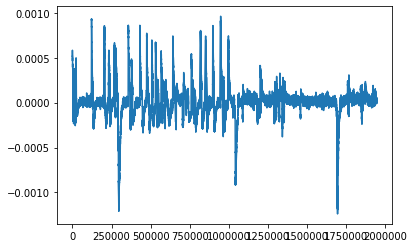

In [56]:
plt.plot(raw.get_data()[1,:])

### create new RawArray

In [39]:
ieegdata = raw.get_data()
info = mne.create_info(raw.ch_names, raw.info["sfreq"], ch_types='ecog')
raw_new = mne.io.RawArray(ieegdata, info)

Creating RawArray with float64 data, n_channels=25, n_times=1945107
    Range : 0 ... 1945106 =      0.000 ...   972.553 secs
Ready.


In [42]:
bids_basename = mne_bids.BIDSPath(subject="001", session="1", \
                                            task="1", run="1", root=r"C:\Users\ICN_admin\Documents\Decoding_Toolbox\Test_BIDS")

In [46]:
pybv.write_brainvision(ieegdata, raw.info["sfreq"], raw.ch_names, 'dummy_write', os.getcwd())

In [47]:
bv_raw = mne.io.read_raw_brainvision('dummy_write.vhdr')

Extracting parameters from dummy_write.vhdr...
Setting channel info structure...


In [48]:
mapping = {}
for ch in range(len(bv_raw.info['ch_names'])):
    mapping[bv_raw.info['ch_names'][ch]] = 'ecog'
bv_raw.set_channel_types(mapping)

<RawBrainVision | dummy_write.eeg, 25 x 1945107 (972.6 s), ~53 kB, data not loaded>

In [49]:
bv_raw.info['line_freq'] = 50

In [50]:
mne_bids.write_raw_bids(bv_raw, bids_path=bids_basename, overwrite=True)


#  remove dummy file
os.remove('dummy_write.vhdr')
os.remove('dummy_write.eeg')
os.remove('dummy_write.vmrk')

Extracting parameters from C:\Users\ICN_admin\Documents\Decoding_Toolbox\dummy_write.vhdr...
Setting channel info structure...

Writing 'C:\Users\ICN_admin\Documents\Decoding_Toolbox\Test_BIDS\README'...

References
----------
Appelhoff, S., Sanderson, M., Brooks, T., Vliet, M., Quentin, R., Holdgraf, C., Chaumon, M., Mikulan, E., Tavabi, K., Höchenberger, R., Welke, D., Brunner, C., Rockhill, A., Larson, E., Gramfort, A. and Jas, M. (2019). MNE-BIDS: Organizing electrophysiological data into the BIDS format and facilitating their analysis. Journal of Open Source Software 4: (1896). https://doi.org/10.21105/joss.01896

Holdgraf, C., Appelhoff, S., Bickel, S., Bouchard, K., D'Ambrosio, S., David, O., … Hermes, D. (2019). iEEG-BIDS, extending the Brain Imaging Data Structure specification to human intracranial electrophysiology. Scientific Data, 6, 102. https://doi.org/10.1038/s41597-019-0105-7


Writing 'C:\Users\ICN_admin\Documents\Decoding_Toolbox\Test_BIDS\participants.tsv'...

parti

<ipython-input-50-01d1bea4e286>:1: RuntimeWarning: No events found or provided. Please add annotations to the raw data, or provide the events_data and event_id parameters. If this is resting state data it is recommended to name the task "rest".
  mne_bids.write_raw_bids(bv_raw, bids_path=bids_basename, overwrite=True)



Writing 'C:\Users\ICN_admin\Documents\Decoding_Toolbox\Test_BIDS\sub-001\ses-1\sub-001_ses-1_scans.tsv'...

filename	acq_time
ieeg/sub-001_ses-1_task-1_run-1_ieeg.vhdr	n/a
Wrote C:\Users\ICN_admin\Documents\Decoding_Toolbox\Test_BIDS\sub-001\ses-1\sub-001_ses-1_scans.tsv entry with ieeg\sub-001_ses-1_task-1_run-1_ieeg.vhdr.


### now check if it's possible to read BV 

In [51]:
PATH_BV = r"C:\Users\ICN_admin\Documents\Decoding_Toolbox\Test_BIDS\sub-001\ses-1\ieeg\sub-001_ses-1_task-1_run-1_ieeg.vhdr"

In [52]:
raw_BV = mne.io.read_raw_brainvision(PATH_BV)

Extracting parameters from C:\Users\ICN_admin\Documents\Decoding_Toolbox\Test_BIDS\sub-001\ses-1\ieeg\sub-001_ses-1_task-1_run-1_ieeg.vhdr...
Setting channel info structure...


In [53]:
raw_BV.get_data().shape

(25, 1945107)

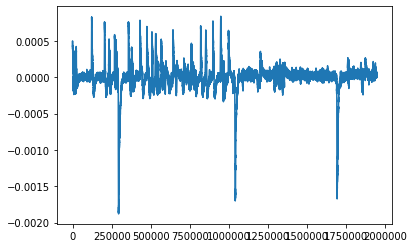

In [55]:
plt.plot(raw_BV.get_data()[0,:])